## Logistic Regression Implementation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

In [3]:
# Create a dataset, this dataset doesn't have any missing values and doesn't need any preprocessing
X, y = make_classification(n_samples=1000, 
                           n_features=10, 
                           n_classes=2, 
                           random_state=15)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
from sklearn.linear_model import LogisticRegression

# Create a model
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

# Predict
y_pred = logistic.predict(X_test)
print(y_pred)

[0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1
 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0
 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1
 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1
 0 1 0 0]


In [14]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, ConfusionMatrixDisplay

# Calculate accuracy
score = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f'Accuracy: {score}')
print(classification_report(y_true=y_test, y_pred=y_pred))

Accuracy: 0.9166666666666666
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       157
           1       0.92      0.90      0.91       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



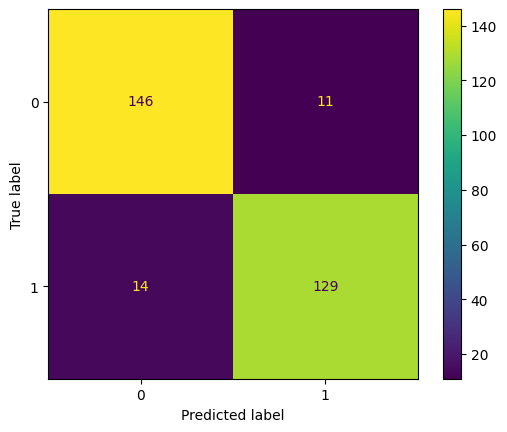

In [15]:
# Create a Confusion Matrix using ConfusionMatrixDisplay
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=logistic.classes_)
disp.plot();


# Hyperparameter Tuning And Cross Validation

## Grid SearchCV

In [25]:
# Creating hyperparameter grid
model = LogisticRegression(max_iter=2000)
penalty = ['l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

In [18]:
# Create a dictionary where the keys are the hyperparameter names and the values are lists of hyperparameters
params = dict(penalty=penalty,
              C=c_values,
              solver=solver)
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [26]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# Create a StratifiedKFold object
cv = StratifiedKFold()

# Create a GridSearchCV object
grid = GridSearchCV(estimator=model, 
                    param_grid=params, 
                    cv=cv, 
                    n_jobs=-1, 
                    scoring='accuracy')

grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(max_iter=2000), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [27]:
grid.fit(X_train, y_train)

/Users/ricardo-rojas/Library/Mobile Documents/com~apple~CloudDocs/machine_learning/ml_engineer/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
200 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ricardo-rojas/Library/Mobile Documents/com~apple~CloudDocs/machine_learning/ml_engineer/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ricardo-rojas/Library/Mobile Documents/com~apple~CloudDocs/machine_learning/ml_engineer/venv/lib/python3.12/site-packages

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(max_iter=2000), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [28]:
grid.best_params_

{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}

In [31]:
# Print best score, best hyperparameters, and the best estimator
print(f'Best Score: {grid.best_score_}')
print(f'Best Hyperparameters: {grid.best_params_}')
print(f'Best Estimator: {grid.best_estimator_}')

Best Score: 0.9242857142857142
Best Hyperparameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
Best Estimator: LogisticRegression(C=0.01, max_iter=2000, penalty='l1', solver='saga')


In [32]:
# Make predictions
y_pred = grid.predict(X_test)

In [33]:
# Calculate accuracy score and classification report
score = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f'Accuracy: {score}')
print(classification_report(y_true=y_test, y_pred=y_pred))

Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       157
           1       0.94      0.89      0.91       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



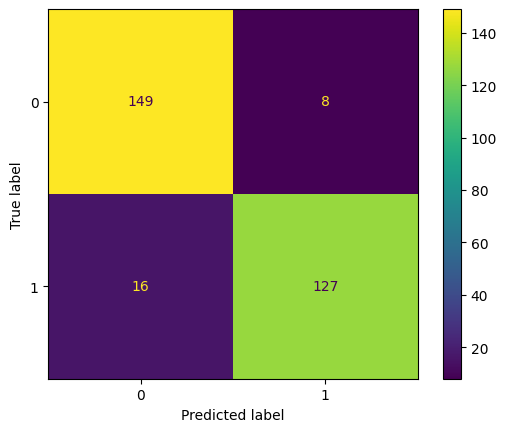

In [34]:
# Create a Confusion Matrix using ConfusionMatrixDisplay
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=model.classes_)
disp.plot();

## Randomized SearchCV

In [35]:
from sklearn.model_selection import RandomizedSearchCV

# Model creation
model = LogisticRegression(max_iter=2000)

# Create a RandomizedSearchCV object
random = RandomizedSearchCV(estimator=model, 
                            param_distributions=params, 
                            n_iter=10, 
                            cv=cv, 
                            n_jobs=-1, 
                            scoring='accuracy')

# Fit the model
random.fit(X_train, y_train)

/Users/ricardo-rojas/Library/Mobile Documents/com~apple~CloudDocs/machine_learning/ml_engineer/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ricardo-rojas/Library/Mobile Documents/com~apple~CloudDocs/machine_learning/ml_engineer/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ricardo-rojas/Library/Mobile Documents/com~apple~CloudDocs/machine_learning/ml_engineer/venv/lib/python3.12/site-packages/sk

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=LogisticRegression(max_iter=2000), n_jobs=-1,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [36]:
# Print best score, best hyperparameters, and the best estimator
print(f'Best Score: {random.best_score_}')
print(f'Best Hyperparameters: {random.best_params_}')
print(f'Best Estimator: {random.best_estimator_}')

Best Score: 0.9242857142857142
Best Hyperparameters: {'solver': 'saga', 'penalty': 'l1', 'C': 0.01}
Best Estimator: LogisticRegression(C=0.01, max_iter=2000, penalty='l1', solver='saga')


In [37]:
# Make predictions
y_pred = random.predict(X_test)

In [38]:
# Calculate accuracy score and classification report
score = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f'Accuracy: {score}')
print(classification_report(y_true=y_test, y_pred=y_pred))

Accuracy: 0.9133333333333333
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       157
           1       0.93      0.89      0.91       143

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



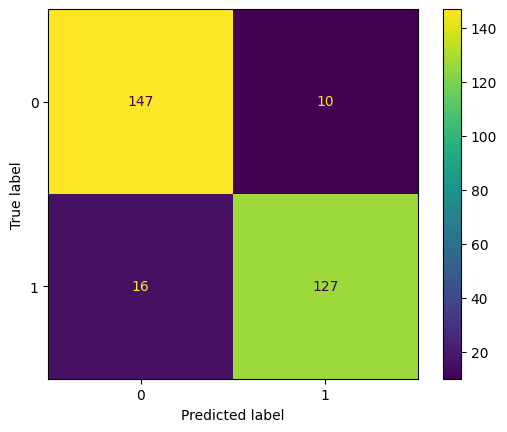

In [39]:
# Create a Confusion Matrix using ConfusionMatrixDisplay
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=model.classes_)
disp.plot();

## Logistic Regression For Multiclass Classification Problem

In [40]:
# Create a dataset, this dataset doesn't have any missing values and doesn't need any preprocessing
X, y = make_classification(n_samples=1000, 
                           n_features=10,
                           n_informative=3, 
                           n_classes=3, 
                           random_state=15)

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
from sklearn.multiclass import OneVsRestClassifier

# Create a model
logistic = LogisticRegression()

# Wrap the Logistic Regression model with OneVsRestClassifier
logistic_ovr = OneVsRestClassifier(logistic)

# Fit the model
logistic_ovr.fit(X_train, y_train)

# Make predictions
y_pred = logistic_ovr.predict(X_test)

In [44]:
# Calculate accuracy score and classification report
score = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f'Accuracy: {score}')
print(classification_report(y_true=y_test, y_pred=y_pred))

Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       102
           1       0.81      0.73      0.77       102
           2       0.71      0.82      0.76        96

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.80      0.79      0.79       300



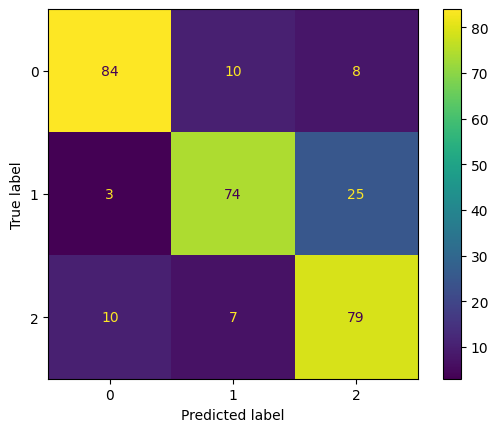

In [46]:
# Create a Confusion Matrix using ConfusionMatrixDisplay
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=logistic_ovr.classes_)
disp.plot();

## Logistic Regression for Imbalanced Dataset

In [47]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter

# Create a dataset, this dataset doesn't have any missing values and doesn't need any preprocessing
X, y = make_classification(n_samples=10000,
                           n_features=2,
                           n_clusters_per_class=1,
                           n_redundant=0,
                           weights=[0.99],
                           random_state=10)

In [51]:
X[:5]

array([[ 1.87991016, -1.4850347 ],
       [ 0.37708311, -2.23858488],
       [ 1.35431163, -2.66463822],
       [-0.50984315, -1.50294963],
       [ 0.8635608 , -1.90636446]])

In [48]:
# Summarize the dataset
Counter(y)

Counter({np.int64(0): 9846, np.int64(1): 154})

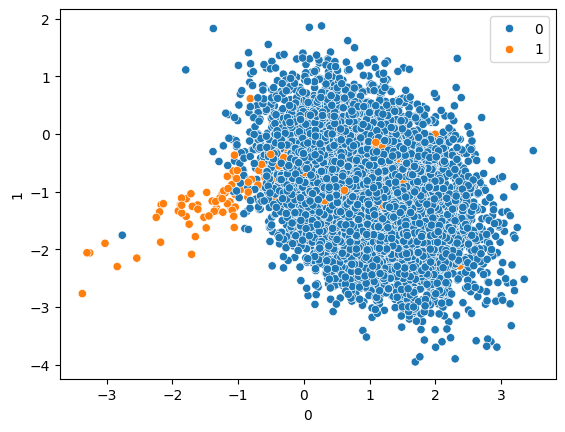

In [53]:
# Plot the dataset
sns.scatterplot(x=pd.DataFrame(X)[0], 
                y=pd.DataFrame(X)[1], 
                hue=y);

In [54]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [55]:
# Creating a list of dictionaries containing the class weights
class_weight = [{0:w, 1:y} for w in [1, 10, 50, 100] for y in [1, 10, 50, 100]]

In [56]:
class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

## Hyperparameter Tuning

In [59]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
penalty = ['l1', 'l2', 'elasticnet']
c_values = [100,10,1.0,0.1,0.01]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
class_weight = [{0:w, 1:y} for w in [1, 10, 50, 100] for y in [1, 10, 50, 100]]

In [60]:
params = dict(penalty=penalty,
              C=c_values,
              solver=solver,
              class_weight=class_weight)

In [61]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# Create a StratifiedKFold object
cv = StratifiedKFold()

# Create a GridSearchCV object with the model, hyperparameter grid, and cross-validation
grid = GridSearchCV(estimator=model,
                    param_grid=params,
                    scoring='accuracy',
                    cv=cv)

In [63]:
# Fit the model
grid.fit(X_train, y_train)

/Users/ricardo-rojas/Library/Mobile Documents/com~apple~CloudDocs/machine_learning/ml_engineer/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ricardo-rojas/Library/Mobile Documents/com~apple~CloudDocs/machine_learning/ml_engineer/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ricardo-rojas/Library/Mobile Documents/com~apple~CloudDocs/machine_learning/ml_engineer/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ricardo-rojas/Library/Mobile Documents/com~apple~CloudDocs/machine_learning/ml_engineer/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [64]:
# Print best score, best hyperparameters, and the best estimator
print(f'Best Score: {grid.best_score_}')
print(f'Best Hyperparameters: {grid.best_params_}')
print(f'Best Estimator: {grid.best_estimator_}')

Best Score: 0.9881333333333334
Best Hyperparameters: {'C': 0.01, 'class_weight': {0: 10, 1: 50}, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Estimator: LogisticRegression(C=0.01, class_weight={0: 10, 1: 50}, solver='newton-cg')


In [66]:
# Make predictions
y_pred = grid.predict(X_test)

In [67]:
# Calculate accuracy score and classification report
score = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f'Accuracy: {score}')
print(classification_report(y_true=y_test, y_pred=y_pred))

Accuracy: 0.992
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2470
           1       0.86      0.40      0.55        30

    accuracy                           0.99      2500
   macro avg       0.92      0.70      0.77      2500
weighted avg       0.99      0.99      0.99      2500



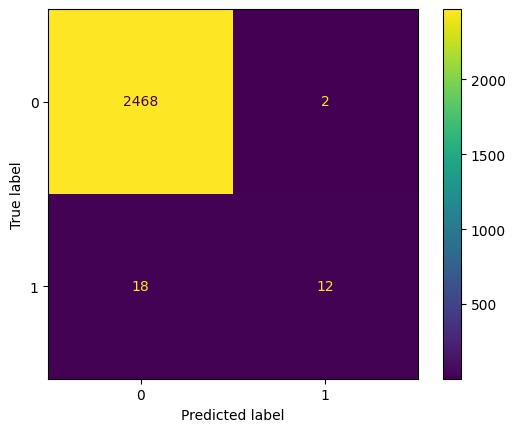

In [69]:
# Create a Confusion Matrix using ConfusionMatrixDisplay
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=grid.classes_)
disp.plot();

## Logistic Regression With ROC curve And ROC AUC score 

In [82]:
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
from matplotlib import pyplot

In [71]:
# Create the dataset
X, y = make_classification(n_samples=1000, 
                           n_classes=2, 
                           random_state=1)

In [72]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [73]:
# Created a dummy model with default 0 as output 
dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [74]:
# Create the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [75]:
# Make predictions on the test set based on probabilities
model_prob = model.predict_proba(X_test)
model_prob

array([[8.17237415e-02, 9.18276259e-01],
       [1.13344259e-01, 8.86655741e-01],
       [9.76832552e-01, 2.31674481e-02],
       [1.81093915e-02, 9.81890609e-01],
       [4.54686794e-02, 9.54531321e-01],
       [2.03249282e-01, 7.96750718e-01],
       [9.93162656e-01, 6.83734407e-03],
       [9.45976087e-01, 5.40239126e-02],
       [8.69028777e-03, 9.91309712e-01],
       [5.91398651e-01, 4.08601349e-01],
       [9.85074068e-01, 1.49259319e-02],
       [8.29281652e-02, 9.17071835e-01],
       [1.37466495e-01, 8.62533505e-01],
       [5.20697767e-03, 9.94793022e-01],
       [9.60063575e-01, 3.99364247e-02],
       [9.50688533e-01, 4.93114672e-02],
       [2.10393564e-02, 9.78960644e-01],
       [8.30240259e-01, 1.69759741e-01],
       [9.62818718e-01, 3.71812822e-02],
       [3.21780632e-02, 9.67821937e-01],
       [9.96085581e-01, 3.91441895e-03],
       [1.14045645e-01, 8.85954355e-01],
       [1.80352806e-01, 8.19647194e-01],
       [4.30414556e-01, 5.69585444e-01],
       [4.115915

In [76]:
# We will use the probabilities of the positive class
model_prob = model_prob[:, 1]
model_prob

array([9.18276259e-01, 8.86655741e-01, 2.31674481e-02, 9.81890609e-01,
       9.54531321e-01, 7.96750718e-01, 6.83734407e-03, 5.40239126e-02,
       9.91309712e-01, 4.08601349e-01, 1.49259319e-02, 9.17071835e-01,
       8.62533505e-01, 9.94793022e-01, 3.99364247e-02, 4.93114672e-02,
       9.78960644e-01, 1.69759741e-01, 3.71812822e-02, 9.67821937e-01,
       3.91441895e-03, 8.85954355e-01, 8.19647194e-01, 5.69585444e-01,
       5.88408407e-01, 9.73099363e-01, 9.65994342e-01, 2.73877518e-03,
       8.01595231e-01, 1.39002986e-01, 3.52089123e-02, 2.85090339e-01,
       8.10370535e-01, 1.02046853e-01, 9.00968269e-01, 1.04921781e-01,
       6.87638127e-03, 9.69967236e-02, 3.08984187e-02, 7.44365926e-01,
       5.29696559e-02, 1.45061252e-02, 4.47168571e-01, 6.62185322e-01,
       9.42074010e-01, 9.99408591e-01, 9.66013718e-01, 3.60317284e-01,
       1.43606468e-01, 1.42698355e-01, 5.19022312e-01, 6.34300275e-02,
       9.15522435e-01, 8.15943076e-01, 6.17835757e-01, 7.87717087e-02,
      

In [81]:
# Calculate the AUC score for the dummy model and the logistic regression model
dummy_auc = roc_auc_score(y_true=y_test, y_score=dummy_model_prob)
model_auc = roc_auc_score(y_true=y_test, y_score=model_prob)
print(f'Dummy Model: ROC AUC = {dummy_auc}')
print(f'Logistic Model: ROC AUC = {model_auc}')

Dummy Model: ROC AUC = 0.5
Logistic Model: ROC AUC = 0.907648


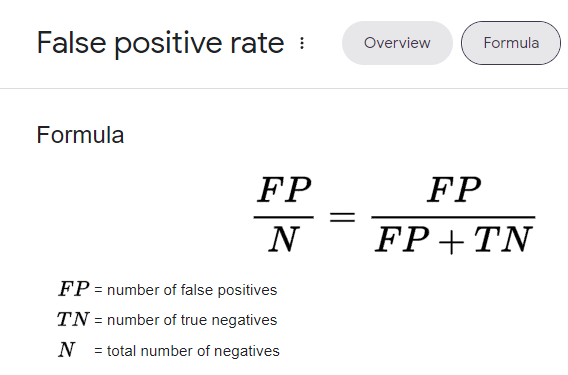
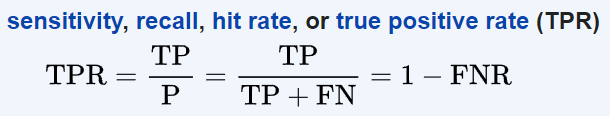

In [133]:
# Calculate the ROC Curve or the dummy model and the logistic regression model
dummy_fpr, dummy_tpr, _ = roc_curve(y_true=y_test, y_score=dummy_model_prob)
model_fpr, model_tpr, _ = roc_curve(y_true=y_test, y_score=model_prob)

In [134]:
thresholds

array([1.99941079e+00, 9.99410789e-01, 9.48821704e-01, 9.45822838e-01,
       9.35475968e-01, 9.33992424e-01, 9.28149306e-01, 9.26128400e-01,
       9.09612674e-01, 9.01641419e-01, 8.98006100e-01, 8.87888976e-01,
       8.55067260e-01, 8.50088690e-01, 8.45815476e-01, 8.32456357e-01,
       8.19802513e-01, 8.15795432e-01, 8.07773360e-01, 8.01684721e-01,
       7.72666184e-01, 7.71984305e-01, 7.18090773e-01, 7.16353949e-01,
       6.61932009e-01, 6.29054005e-01, 6.17692223e-01, 6.09937071e-01,
       5.95782185e-01, 5.88259352e-01, 5.69445881e-01, 5.42763147e-01,
       5.28902010e-01, 5.13580364e-01, 5.10710770e-01, 4.87563605e-01,
       4.84614874e-01, 4.55642609e-01, 4.46920501e-01, 4.25852373e-01,
       3.64309105e-01, 3.56487638e-01, 3.45966312e-01, 3.07821013e-01,
       3.00875411e-01, 2.85434309e-01, 2.84734466e-01, 2.18608803e-01,
       1.96799778e-01, 1.34064894e-01, 1.33282726e-01, 1.30277048e-01,
       1.26943039e-01, 1.04666641e-01, 1.04124073e-01, 7.03330148e-02,
      

In [89]:
model_fpr,model_tpr

(array([0.   , 0.   , 0.   , 0.008, 0.008, 0.016, 0.016, 0.024, 0.024,
        0.032, 0.032, 0.048, 0.048, 0.056, 0.056, 0.072, 0.072, 0.08 ,
        0.08 , 0.088, 0.088, 0.096, 0.096, 0.104, 0.104, 0.112, 0.112,
        0.128, 0.128, 0.136, 0.136, 0.144, 0.144, 0.16 , 0.16 , 0.184,
        0.184, 0.2  , 0.2  , 0.208, 0.208, 0.224, 0.224, 0.24 , 0.24 ,
        0.256, 0.256, 0.296, 0.296, 0.392, 0.392, 0.4  , 0.4  , 0.448,
        0.448, 0.528, 0.528, 0.56 , 0.56 , 0.624, 0.624, 0.952, 0.952,
        1.   ]),
 array([0.   , 0.008, 0.288, 0.288, 0.368, 0.368, 0.376, 0.376, 0.424,
        0.424, 0.44 , 0.44 , 0.528, 0.528, 0.552, 0.552, 0.608, 0.608,
        0.64 , 0.64 , 0.664, 0.664, 0.704, 0.704, 0.752, 0.752, 0.784,
        0.784, 0.792, 0.792, 0.808, 0.808, 0.824, 0.824, 0.832, 0.832,
        0.84 , 0.84 , 0.848, 0.848, 0.904, 0.904, 0.912, 0.912, 0.92 ,
        0.92 , 0.928, 0.928, 0.944, 0.944, 0.952, 0.952, 0.96 , 0.96 ,
        0.968, 0.968, 0.976, 0.976, 0.984, 0.984, 0.992, 0.9

In [109]:
import seaborn as sns


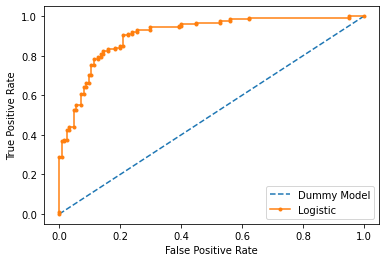

In [125]:
# plot the roc curve for the model
pyplot.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
pyplot.plot(model_fpr, model_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

<ipython-input-135-f291c2c182e8>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


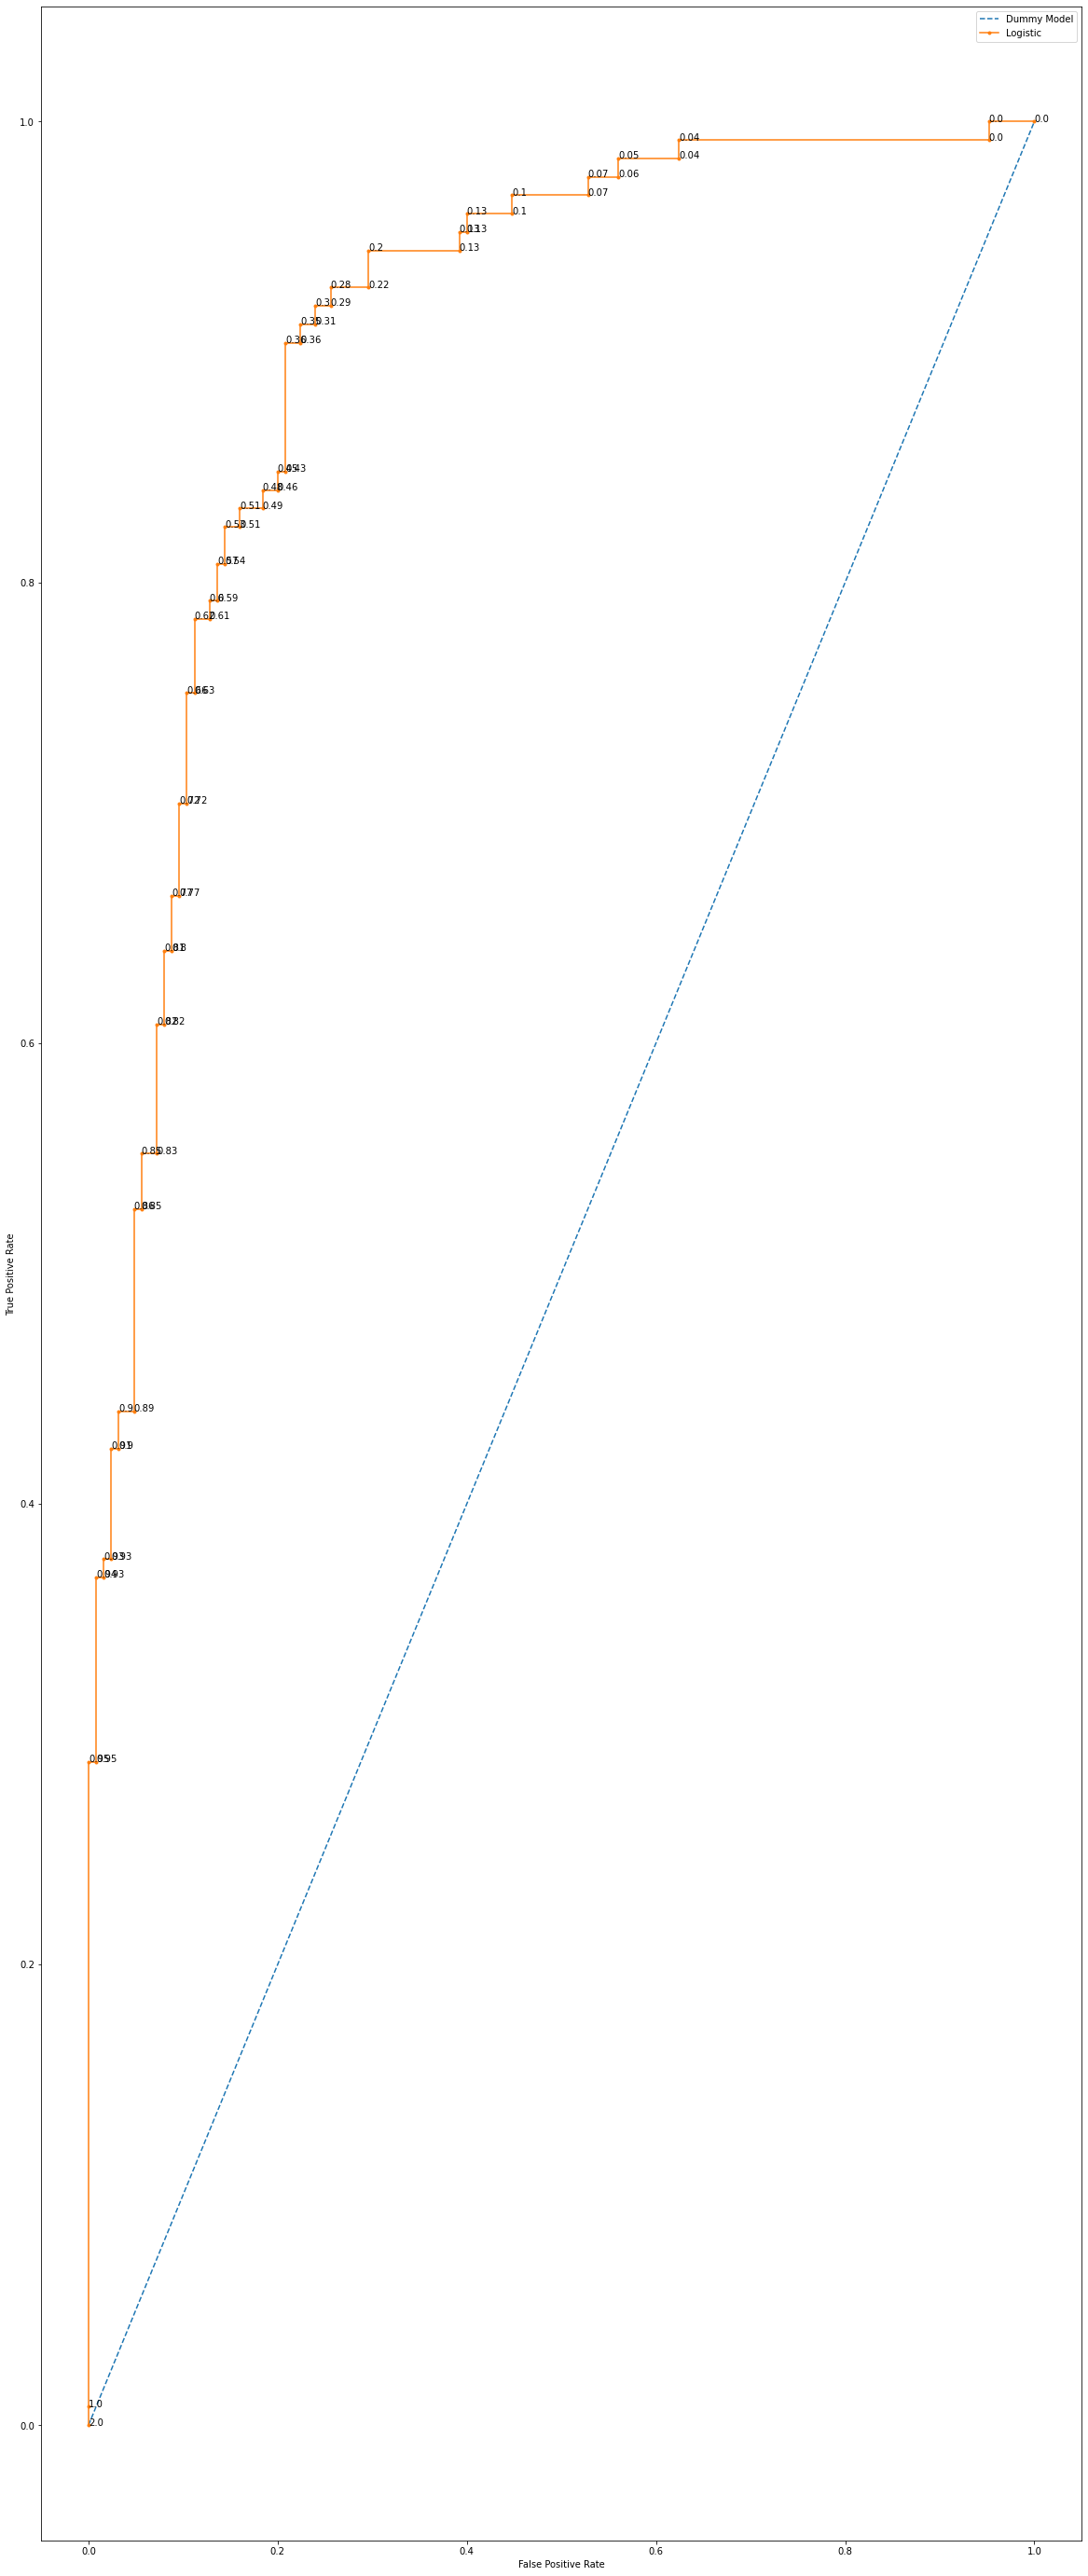

In [135]:
# plot the roc curve for the model
import numpy as np
fig = pyplot.figure(figsize=(20,50))
pyplot.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
pyplot.plot(model_fpr, model_tpr, marker='.', label='Logistic')
ax = fig.add_subplot(111)
for xyz in zip(model_fpr, model_tpr,thresholds):   
    ax.annotate('%s' % np.round(xyz[2],2), xy=(xyz[0],xyz[1]))
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()